<a href="https://colab.research.google.com/github/NamikazeAsh/MNIST-NeuralNetwork/blob/main/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import mnist
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.stats import mode
from sklearn.metrics.pairwise import euclidean_distances

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dataset import & standard-scaler

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('train_X: ' + str(train_X.shape))
print('train_Y: ' + str(train_y.shape))
print('test_X:  '  + str(test_X.shape))
print('test_Y:  '  + str(test_y.shape))

mean = train_X.mean()
std = train_X.std()

train_X = (train_X-mean)/std
test_X = (test_X-mean)/std

print(train_X.mean(),train_X.std(),test_X.mean(),test_X.std())

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
train_X: (60000, 28, 28)
train_Y: (60000,)
test_X:  (10000, 28, 28)
test_Y:  (10000,)
-3.064638490070051e-17 0.9999999999999998 0.0060177948928480576 1.0077000453879372


Training data has 60,000 matrices of 28 x 28 <br>
Test data has 10,000 matrices of 28 x 28

# Euclidean Distance

## Library

In [4]:
train_X = train_X.reshape(len(train_X), -1)
test_X = test_X.reshape(len(test_X), -1)
print("Calculating Euclid Distance")
euclid_matrix_l = euclidean_distances(test_X, train_X)

Calculating Euclid Distance


In [5]:
print(f"Distance matrix shape: {euclid_matrix_l.shape}")
euclid_matrix_l

Distance matrix shape: (10000, 60000)


array([[30.49347374, 33.73698591, 30.64000451, ..., 30.72774416,
        30.94334419, 29.93467693],
       [36.29571914, 37.16568463, 37.83390898, ..., 36.54600987,
        33.96240682, 34.38250442],
       [29.9368145 , 32.70375676, 29.70772894, ..., 30.04280102,
        27.40202129, 27.23465688],
       ...,
       [33.44339384, 37.27477696, 34.09572819, ..., 32.41351585,
        33.46633925, 31.47693645],
       [34.28231512, 33.86866676, 35.74125611, ..., 33.77537401,
        29.49179966, 30.00370839],
       [37.47275041, 31.98073422, 40.75626875, ..., 39.34297271,
        26.25689015, 37.79375803]])

# Cosine similarity matrix

In [6]:
# #making vector a as image 1 in 1d
# cosine_matrix = np.zeros((1000,1000))

# for i in range(1000):

#   vec_a = train_X[i].flatten()

#   for j in range(1000):
#     if i!=j:
#       #using diff instances for vector b from all other images
#       vec_b = train_X[j].flatten()

#       #deriving a.b (dot product)
#       abdot = np.dot(vec_a,vec_b)

#       # deriving |a| and |b|
#       norm_a = np.linalg.norm(vec_a)
#       norm_b = np.linalg.norm(vec_b)

#       #cosT = a.b/|a||b|
#       cosine_sim = abdot/(norm_a * norm_b)

#       #storing in matrix
#       cosine_matrix[i,j] = cosine_sim
#     else:
#       cosine_matrix[i,j] = 1

# print(cosine_matrix,(cosine_matrix.shape))

# #loop in numpy transformations/vectorized?
# #technique : vectorization in python => reduces python loops => numpy runs in c.

# Custom KNN

In [7]:
k=3
nearest_indices = np.argsort(euclid_matrix_l, axis=1)[:, :k] #returns incides for up to k nearest values, in order.

nearest_labels = train_y[nearest_indices] #labels of the closest indices based on distance
predictions = mode(nearest_labels, axis=1).mode.flatten()

accuracy = np.mean(predictions == test_y) #correct predictions/total predictions from boolean array
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.05%


In [8]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Neural Network

In [9]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)), # passing 784 since my data is flattened alr.
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8694 - loss: 0.4207 - val_accuracy: 0.9547 - val_loss: 0.1520
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9678 - loss: 0.1071 - val_accuracy: 0.9542 - val_loss: 0.1497
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9750 - loss: 0.0803 - val_accuracy: 0.9633 - val_loss: 0.1206
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9790 - loss: 0.0633 - val_accuracy: 0.9645 - val_loss: 0.1263
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0460 - val_accuracy: 0.9682 - val_loss: 0.1190
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9851 - loss: 0.0432 - val_accuracy: 0.9720 - val_loss: 0.1074
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9879 - loss: 0.0361 - val_accuracy: 0.9712 - val_loss: 0.1120
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0312 - 

In [11]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.9741 - loss: 0.1131
Test Accuracy: 97.41%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


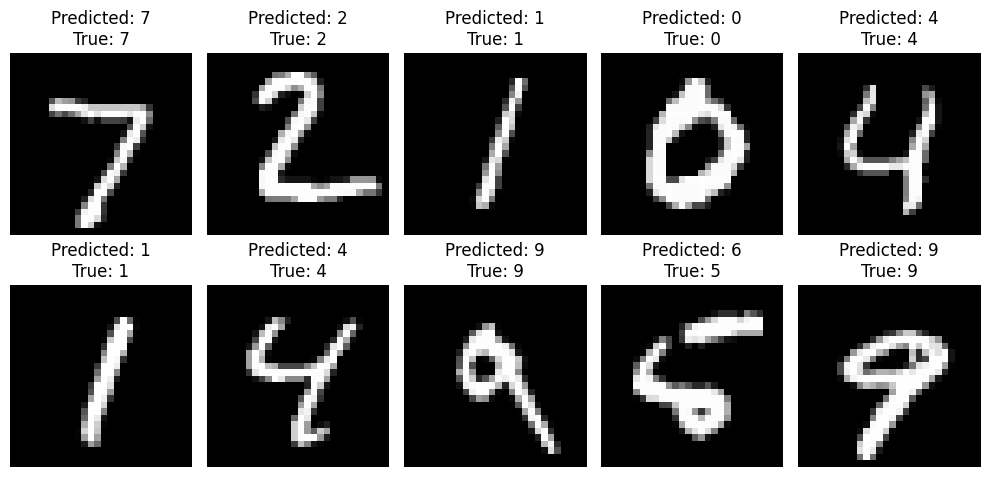

In [12]:
predictions = model.predict(test_X[:10])
predicted_classes = np.argmax(predictions, axis=1)  # Get the index of the highest probability
true_classes = test_y[:10]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_X[i].reshape(28, 28), cmap='gray')  # Reshape for visualization
    plt.title(f"Predicted: {predicted_classes[i]}\nTrue: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


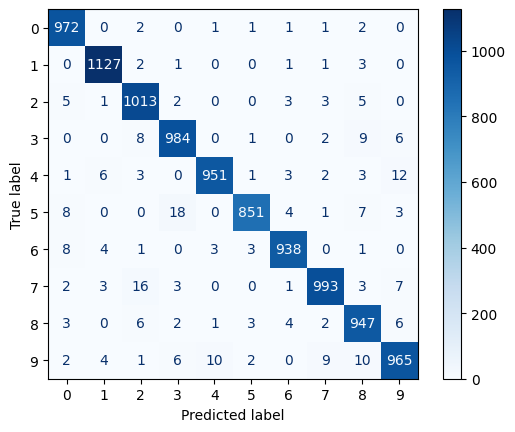

In [13]:
# Get predictions for all test images
predictions = model.predict(test_X)
predicted_classes = np.argmax(predictions, axis=1)

# Generate and display the confusion matrix
cm = confusion_matrix(test_y, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.show()


Correct Predictions<br>972 0's, 1127 1's, 1013 2's, 984 3's, 951 4's<br> 851 5's, 938 6's,993 7's,947 8's, 965 9's